In [3]:
from IPython.display import Image

# 1 비지도 학습

## 1.1 얀르쿤

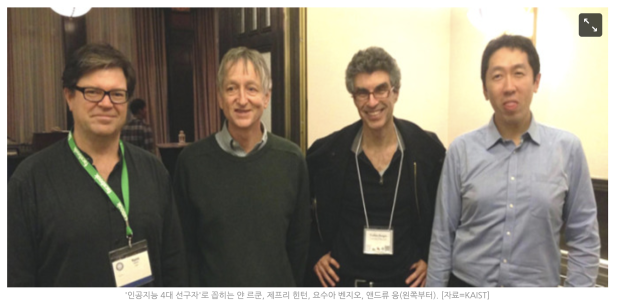

In [5]:
Image("Clu1.png")

- 지능이 케이크라면, 비지도 학습은 케이크의 빵, 지도 학습은 케이크 위의 크림, 강화학습은 케이크위의 체리
- 이 말은 비지도학습의 무궁무진한 가능성에 대한 언급

## 1.2 비지도 학습

- 군집 Clustering : 비슷한 샘플을 모음
- 이상치 탐지 Outier detection : 정상 데이터가 어떻게 보이는지 학습, 비정상 샘플을 감지
- 밀도 추정 : 데이터셋의 확률 밀도 함수 Probability Density Function PDF를 추정. 이상치 탐지 등에 사용

## 1.3 K-Means

- 군집화에서 가장 일반적인 알고리즘
- 군집 중심(centroid)이라는 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화
- 일반적인 군집화에서 가장 많이 사용되는 기법
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐

## 1.4 K-Means 알고리즘

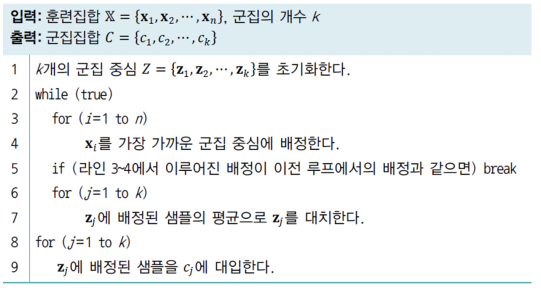

In [6]:
Image("Clu2.png")

## 1.5 원리

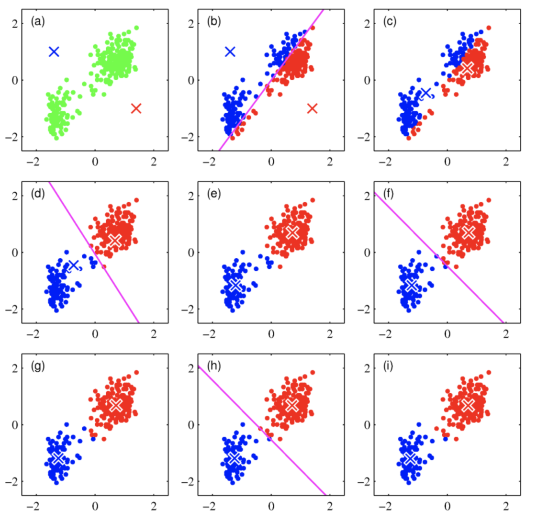

In [7]:
Image("Clu3.png")

- 초기 중심점을 설정
- 각 데이터는 가장 가까운 중심점에 소속
- 중심점에 할당된 평균값으로 중심점 이동
- 각 데이터는 이동된 중심점 기준으로 가장 가까운 중심점에 소속
- 다시 중심점에 할당된 데이터들의 평균값으로 중심점 이동
- 데이터들의 중심점 소속 변경이 없으면 종료

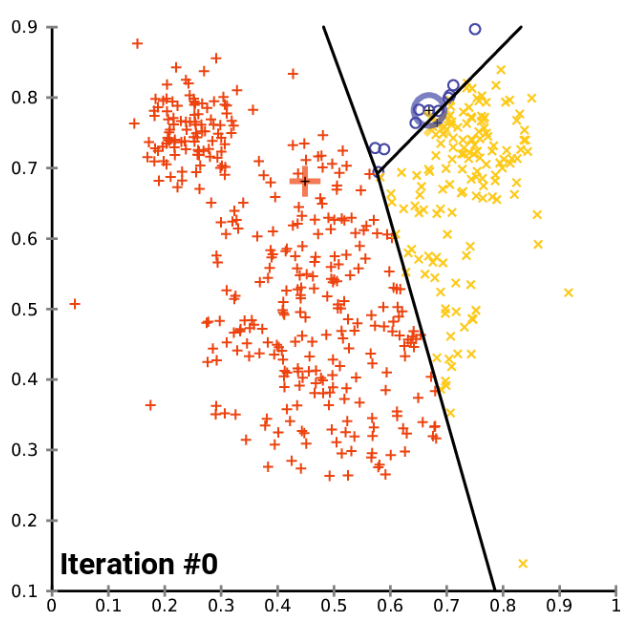

In [8]:
Image("Clu4.png")

## 1.6 iris 데이터로 실습

In [29]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

## 1.7 특징 이름 - 항상 뒤에 (cm)가 불편했다

In [30]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 1.8 뒷 글자 자르기~

In [31]:
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

## 1.9 iris 데이터 정리

In [32]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1.10 편의상 두 개의 특성만

In [33]:
feature = iris_df[['petal length','petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## 1.11 군집화 시작~

In [34]:
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(n_clusters=3)

- n_clusters : 군집화 할 개수, 즉 군집 중심점의 개수
- init : 초기 군집 중심점의 좌표를 설정하는 방식을 결정
- max_iter : 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료

## 1.12 결과 라벨~ (군집화라서 지도학습의 라벨과 다르다)

In [35]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## 1.13 군집 중심값

In [36]:
model.cluster_centers_

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

## 1.14 다시 정리 (그림 그리기 위해)

In [37]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


## 1.15 결과를 확인하기 위해

## 1.16 결론

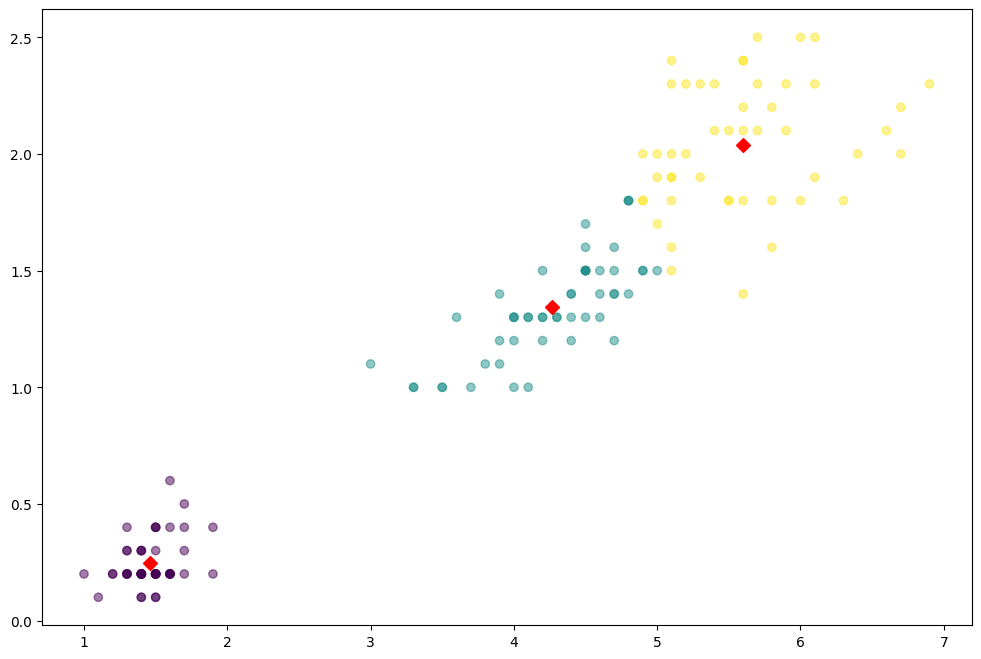

In [38]:
centers = pd.DataFrame(model.cluster_centers_, columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12,8))
plt.scatter(feature['petal length'], feature['petal width'], c=feature['cluster'], alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

# 2 make_blobs

## 2.1 make_blobs

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 군집화 연습을 위한 데이터 생성기

## 2.2 데이터 정리

In [52]:
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


## 2.3 군집화

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

## 2.4 결과 도식화

## 2.5 결론

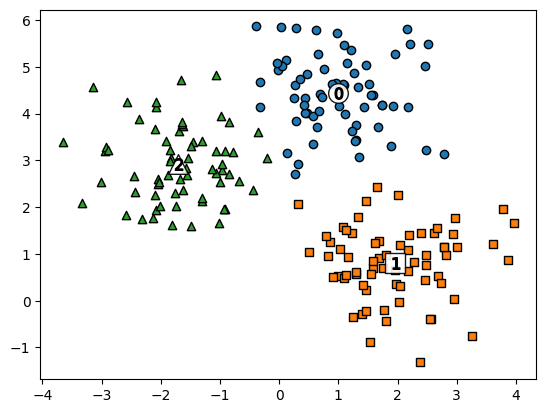

In [58]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'],
                edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolors='k', marker='$%d$' % label)

plt.show()

## 2.6 결과 확인

In [59]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


# 3 군집 평가

## 3.1 군집 결과의 평가

- 분류기는 평가 기준(정답)을 가지고 있지만, 군집은 그렇지 않다.
- 군집 결과를 평가하기 위해 실루엣 분석을 많이 활용한다.

## 3.2 실루엣 분석

- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼어 있는지 나타냄
- 다른 군집과는 거리가 떨어져 있고 동일 군집간의 데이터는 서로 가깝게 잘 뭉쳐 있는지 확인
- 군집화가 잘 되어 있을 수록 개별 군집은 비슷한 정도의 여유공간을 가지고 있음
- 실루엣 계수 : 개별 데이터가 가지는 군집화 지표

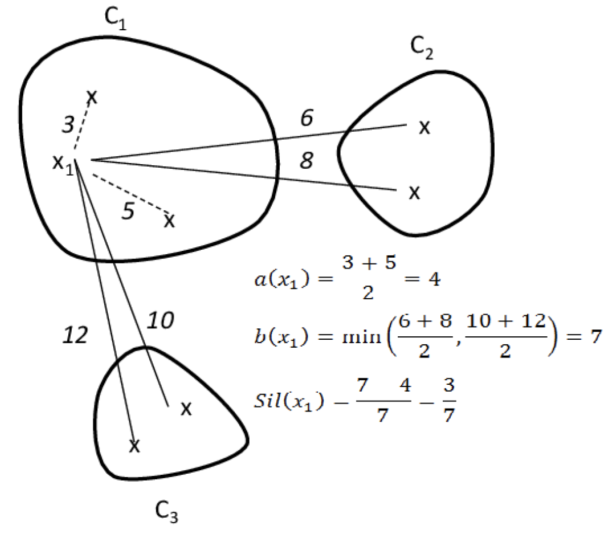

In [9]:
Image("Clu5.png")

## 3.3 직접 보면서 이해해 보자 n=2인 경우

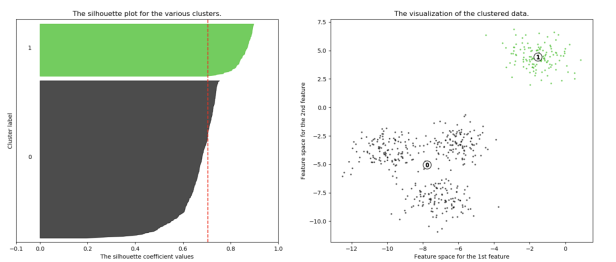

In [11]:
Image("Clu6.png")

- 1번 군집의 경우 0번 군집과 떨어져 있고 잘 뭉쳐있음
- 0번 군집의 경우 내부 데이터끼리 많이 떨어져 있음

## 3.4 n=3인 경우

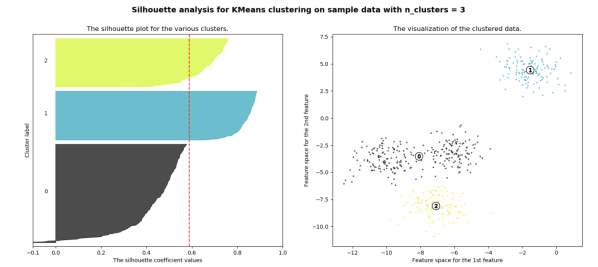

In [12]:
Image("Clu7.png")

- 0번 군집의 경우 2번 군집과 가깝게 위치해 있음

## 3.5 n=4인 경우

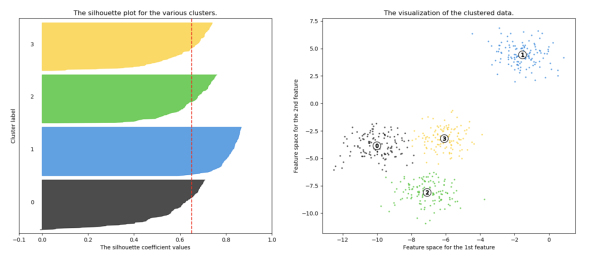

In [13]:
Image("Clu8.png")

## 3.6 데이터 읽고

In [60]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

## 3.7 군집 결과 정리하고

In [61]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## 3.8 군집 결과 평가를 위한 작업

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value', avg_value)
print('silhouette_samples() return 값의 shape', score_values.shape)

avg_value 0.5528190123564095
silhouette_samples() return 값의 shape (150,)


## 3.9 sklearn의 공식 홈페이지 코드

In [71]:
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X, y = make_blobs(
        n_samples=500,
        n_features=2,
        centers=4,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=True,
        random_state=1,
)  # For reproducibility

    

    for n_clusters in cluster_lists:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()



## 3.10 실루엣 플랏의 결과

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


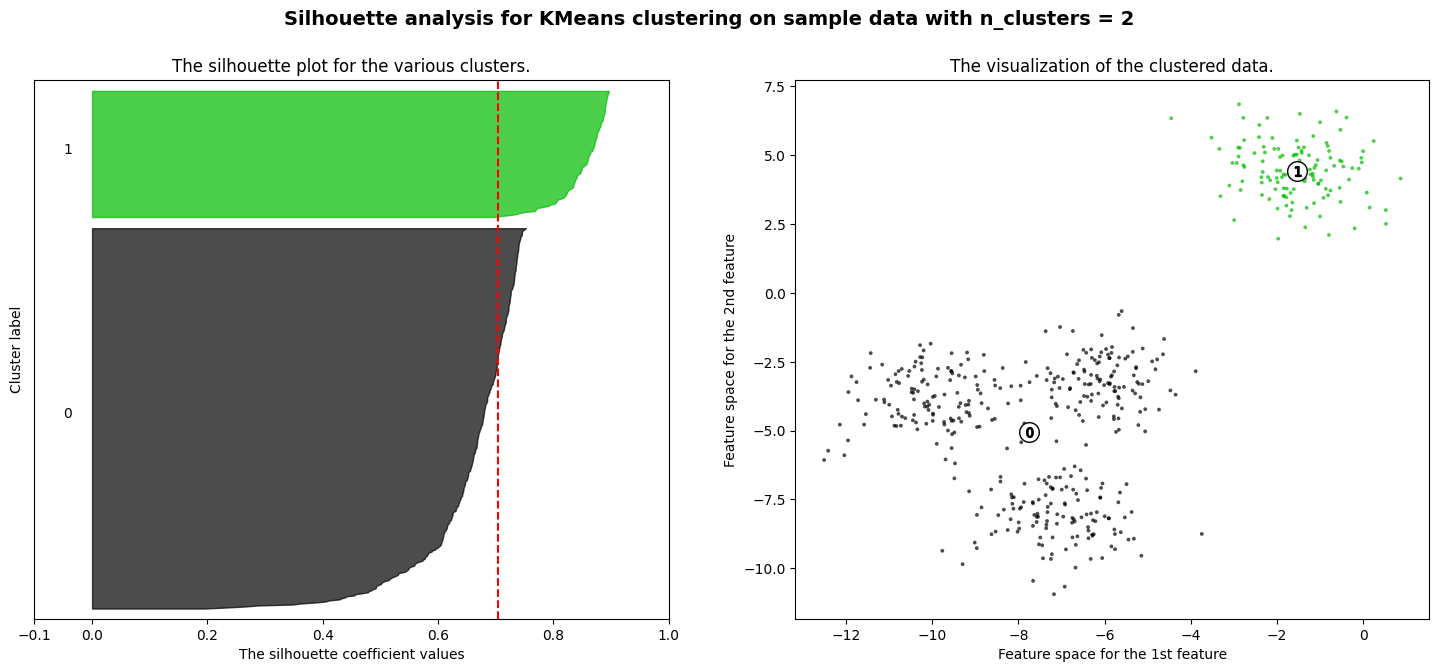

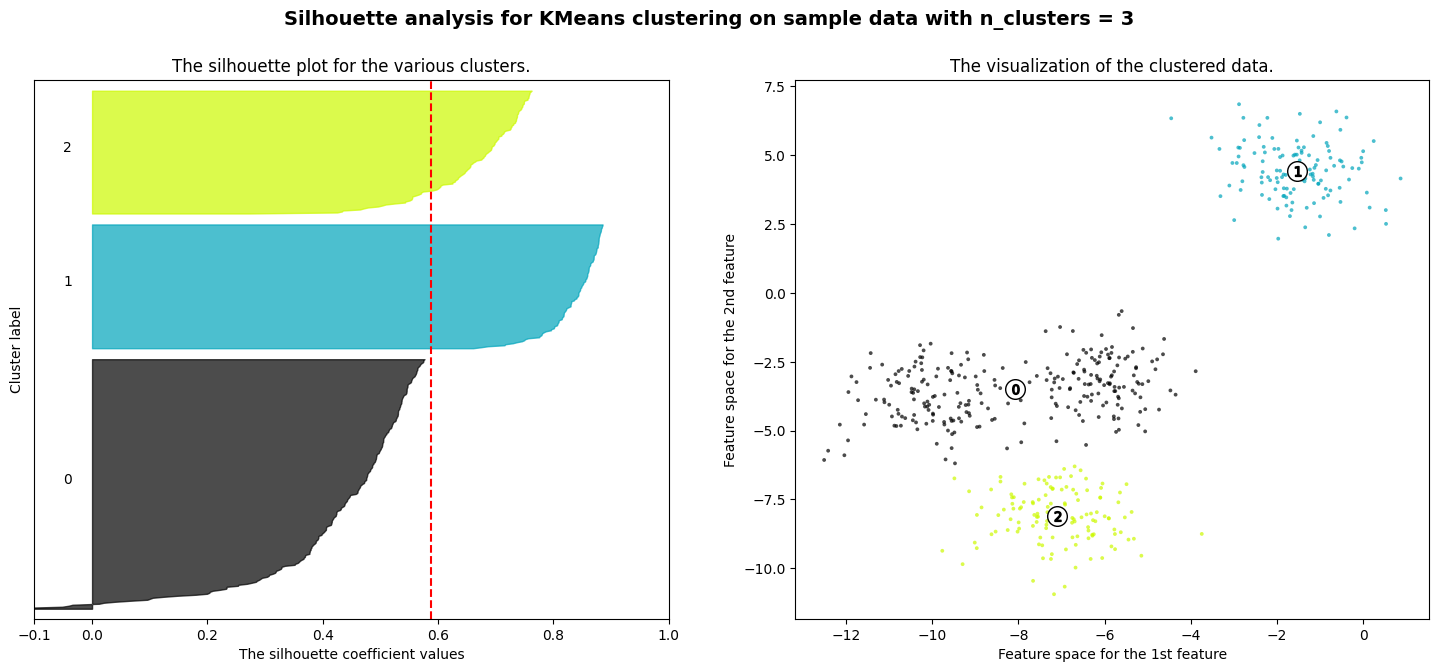

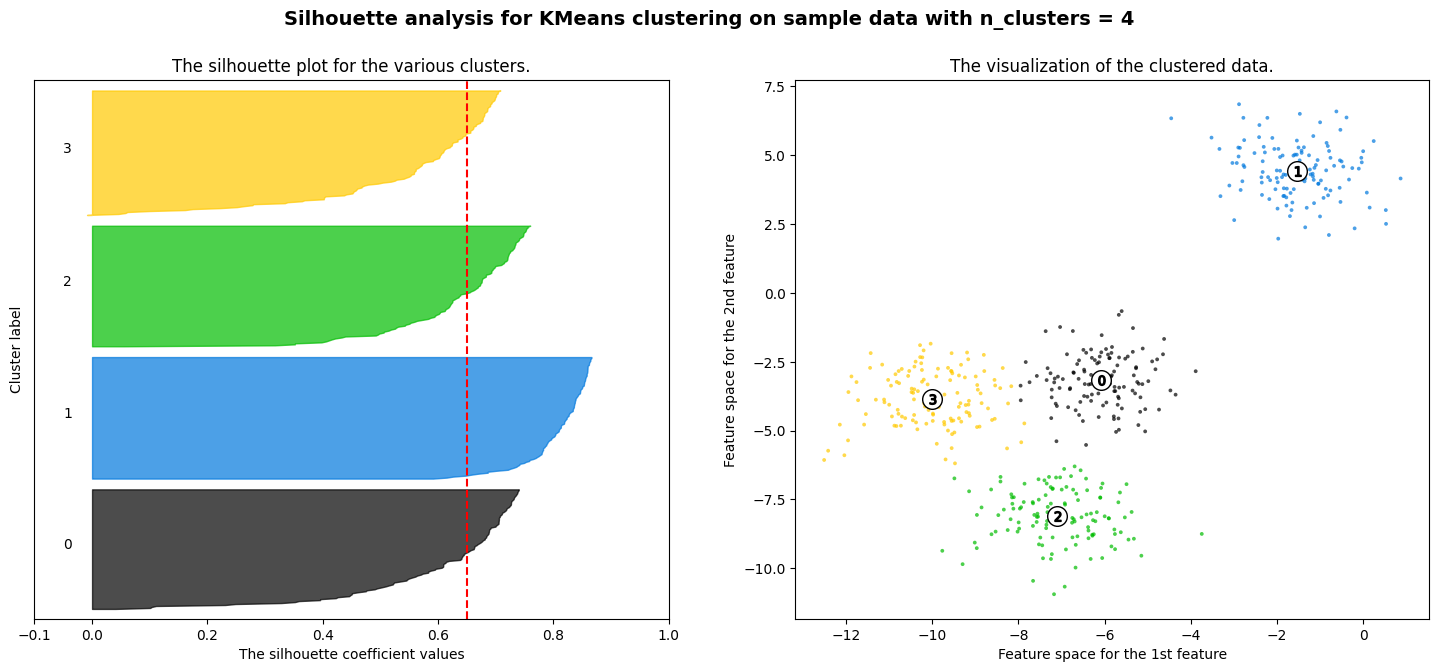

In [73]:
visualize_silhouette([2, 3, 4], iris.data)